## Experiments: Sensitive Analysis Hyperparameter RSAST:


It is runned RSAST in a set of UCR datasets with a predefined number of runs ("runs"). Then, it is selected a range ("range_total") between 1, 10, 30 ,50 and 100 for the selected dataset.

In [115]:
#configure directory to import sast libraries
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path

['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/h

In [116]:
from sast import *
import pandas as pd
import researchpy
import math
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Datasets

In [117]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]


In [118]:
df_other_methods['method'].unique()

array(['SAST', 'ROCKET', 'HIVE-COTEv1', 'BOSS', 'RISE', 'TSF',
       'InceptionTime', 'TS-CHIEF', 'S-BOSS', 'STC', 'ResNet',
       'ProximityForest', 'WEASEL', 'Catch22', 'cBOSS'], dtype=object)

In [119]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')


# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)


/tmp/ipykernel_8042/371163348.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_8042/371163348.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_8042/371163348.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_8042/371163348.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_8042/371163348.py:26: FutureWarning: The default value of regex wil

In [120]:
#create dataset to generate cd diagram
df_perf=pd.pivot_table(df_result, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
#df_perf.classifier_name.unique()

In [121]:
#filter dataset for cd-diagrams with the ds that has already tested all combinations of params
param_per_ds=pd.pivot_table(df_perf, index=['dataset_name'],values=['classifier_name'] ,aggfunc='count')
param_per_ds=param_per_ds.reset_index()
complete_ds=param_per_ds[param_per_ds.classifier_name==max(param_per_ds.classifier_name)]["dataset_name"].unique()

complete_ds=complete_ds.tolist()

#complete_ds.remove('DistalPhalanxOutlineCorrect')

df_perf=df_perf[df_perf.dataset_name.isin(complete_ds)]
df_result=df_result[df_result.dataset_name.isin(complete_ds)]


In [122]:
#get ds tested overall
df_result['dataset_name'].unique()

array(['Chinatown'], dtype=object)

In [123]:
#get columns of generated datasets
df_result.columns.unique()

Index(['Unnamed: 0', 'accuracy', 'time', 'cweights_time', 'fsubsequence_time',
       'tdataset_time', 'tclassifier_time', 'dataset_name', 'classifier_name',
       'rpoint', 'nb_per_class', 'method', 'len_method'],
      dtype='object')

In [124]:
#get ds tested overall
df_perf['dataset_name'].unique()

array(['Chinatown'], dtype=object)

In [125]:
#get columns of generated datasets
df_perf.columns.unique()

Index(['classifier_name', 'dataset_name', 'accuracy'], dtype='object')

### Hyperparameter Tunning RSAST 

#### Accuracy: Subsequence Lenght Method 

In [126]:
filter_param=df_result
filter_param.dataset_name.unique()

array(['Chinatown'], dtype=object)

In [127]:
filter_param.rpoint.unique()

array(['1', '10', '30', '50', '100', 'half_len', '1000', '10000'],
      dtype=object)

In [128]:


#filter_param=df_result[df_result.rpoint=='1']

In [129]:
filter_param.nb_per_class.unique()

array(['1', '10', '30', '50', '100', 'half_instance', '1000', '10000'],
      dtype=object)

In [130]:
#filter_param=filter_param[filter_param.nb_per_class=='half_instance']

In [131]:
# create a pivot table with the mean of score by dataset
len_method_vs_ds=pd.pivot_table(filter_param, values='accuracy', index=['len_method'],columns=['dataset_name'], aggfunc='mean')
len_method_vs_ds=np.transpose(len_method_vs_ds)#[['ACF','PACF']]
len_method_vs_ds=len_method_vs_ds.reset_index()
df_rocket=df_other_methods[df_other_methods["method"]=="ROCKET"]
merged_df = len_method_vs_ds.merge(df_rocket,left_on='dataset_name', right_on='dataset',  how='left')
merged_df=merged_df.drop('dataset',axis=1)
merged_df

,dataset_name,ACF,ACF&PACF,Max ACF,Max PACF,None,PACF,score,method
0,Chinatown,0.946429,0.967894,0.950462,0.965525,0.952454,0.969606,0.982507,ROCKET


In [132]:

# Summary statistics for a Series (single variable)
researchpy.summary_cont(filter_param.groupby(['len_method'])['accuracy'], conf = 0.95)

,N,Mean,SD,SE,95% Conf.,Interval
len_method,,,,,,
ACF,120,0.9464,0.0737,0.0067,0.9331,0.9598
ACF&PACF,162,0.9679,0.0312,0.0025,0.9630,0.9727
Max ACF,120,0.9505,0.0463,0.0042,0.9421,0.9588
Max PACF,120,0.9655,0.0330,0.0030,0.9596,0.9715
None,120,0.9525,0.0372,0.0034,0.9457,0.9592
PACF,120,0.9696,0.0214,0.0020,0.9657,0.9735


In [133]:
stats = filter_param.groupby(['len_method'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats.head(10))

                mean  count       std   ci95_hi   ci95_lo
len_method                                               
ACF         0.946429    120  0.073722  0.959619  0.933238
ACF&PACF    0.967894    162  0.031232  0.972703  0.963085
Max ACF     0.950462    120  0.046267  0.958740  0.942183
Max PACF    0.965525    120  0.033029  0.971434  0.959615
None        0.952454    120  0.037192  0.959108  0.945799
PACF        0.969606    120  0.021383  0.973432  0.965781


#### Generate Boxplot Tunning Hyperparameter

In [134]:
df_result.nb_per_class.unique()

array(['1', '10', '30', '50', '100', 'half_instance', '1000', '10000'],
      dtype=object)

In [135]:
df_result.len_method.unique()

array(['ACF&PACF', 'ACF', 'PACF', 'Max ACF', 'Max PACF', 'None'],
      dtype=object)

rpoint         1        10        30        50       100  half_len
count   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
mean    0.812439  0.919339  0.960155  0.945578  0.934888  0.954325
std          NaN       NaN       NaN       NaN       NaN       NaN
min     0.812439  0.919339  0.960155  0.945578  0.934888  0.954325
25%     0.812439  0.919339  0.960155  0.945578  0.934888  0.954325
50%     0.812439  0.919339  0.960155  0.945578  0.934888  0.954325
75%     0.812439  0.919339  0.960155  0.945578  0.934888  0.954325
max     0.812439  0.919339  0.960155  0.945578  0.934888  0.954325
rpoint         1        10        30        50       100  half_len
count   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
mean    0.566569  0.921283  0.941691  0.942663  0.862974  0.936832
std          NaN       NaN       NaN       NaN       NaN       NaN
min     0.566569  0.921283  0.941691  0.942663  0.862974  0.936832
25%     0.566569  0.921283  0.941691  0.942663  0.862974  0.93

/tmp/ipykernel_8042/3226769778.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


rpoint         1        10        30        50       100  half_len
count   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
mean    0.970845  0.983479  0.982507  0.982507  0.982507  0.982507
std          NaN       NaN       NaN       NaN       NaN       NaN
min     0.970845  0.983479  0.982507  0.982507  0.982507  0.982507
25%     0.970845  0.983479  0.982507  0.982507  0.982507  0.982507
50%     0.970845  0.983479  0.982507  0.982507  0.982507  0.982507
75%     0.970845  0.983479  0.982507  0.982507  0.982507  0.982507
max     0.970845  0.983479  0.982507  0.982507  0.982507  0.982507
rpoint        1        10       30        50       100  half_len
count   1.00000  1.000000  1.00000  1.000000  1.000000  1.000000
mean    0.95724  0.972789  0.96793  0.956268  0.969874  0.975705
std         NaN       NaN      NaN       NaN       NaN       NaN
min     0.95724  0.972789  0.96793  0.956268  0.969874  0.975705
25%     0.95724  0.972789  0.96793  0.956268  0.969874  0.975705
50%    

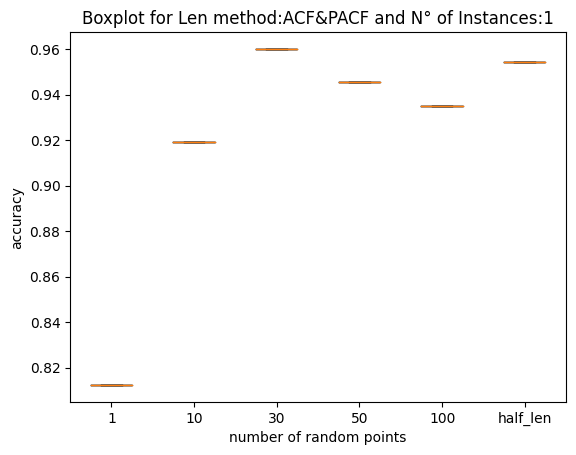

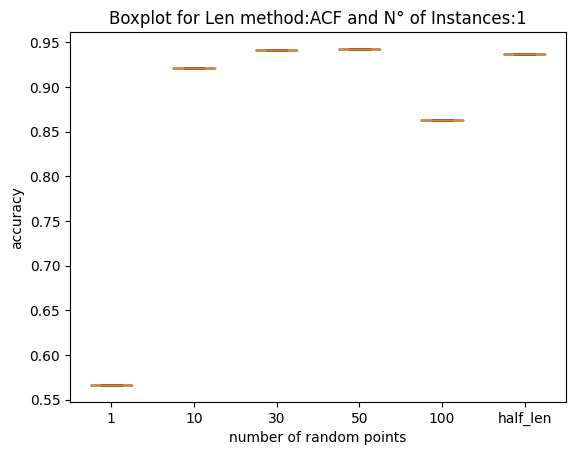

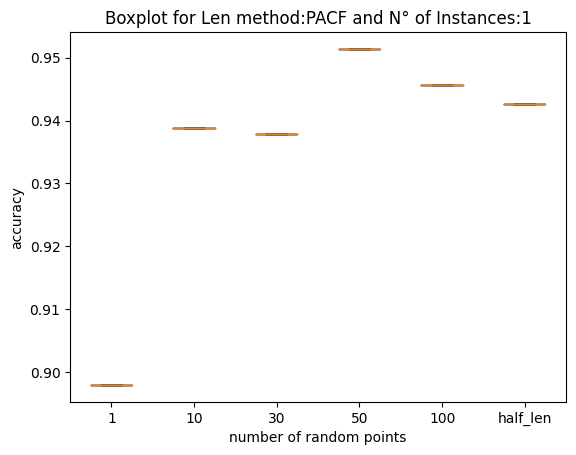

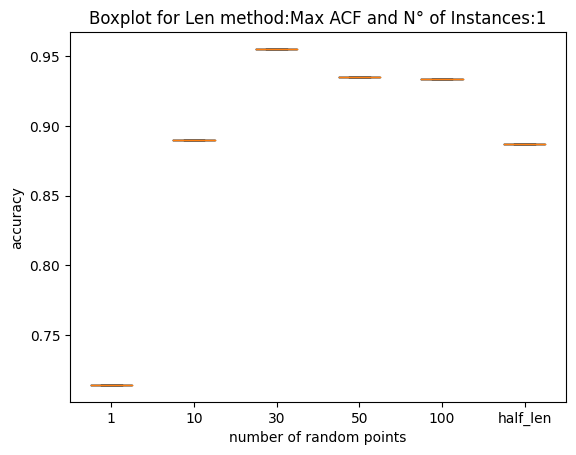

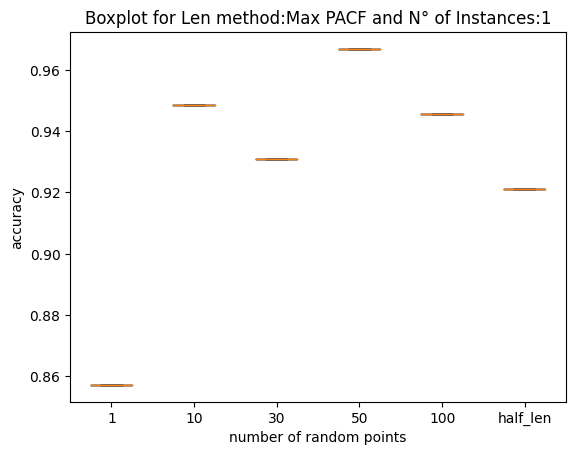

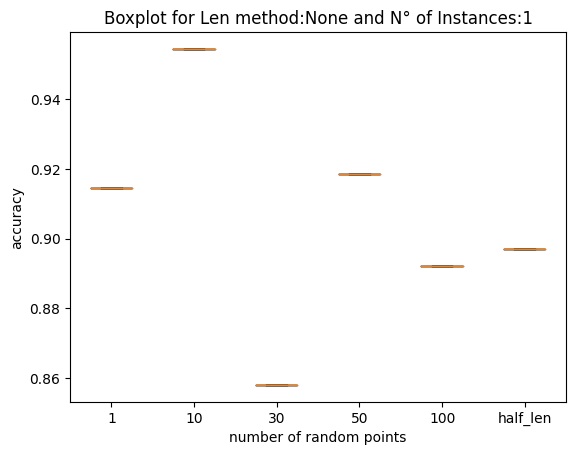

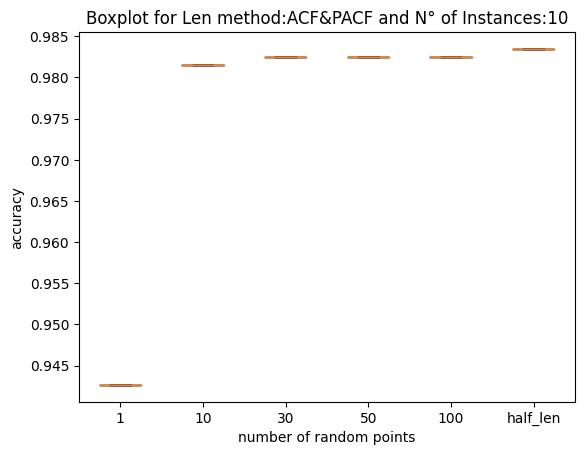

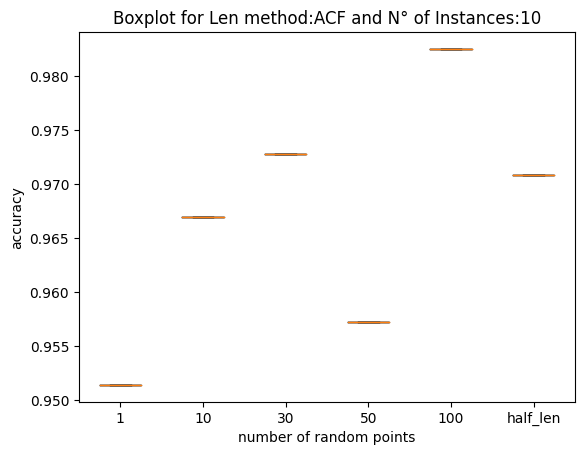

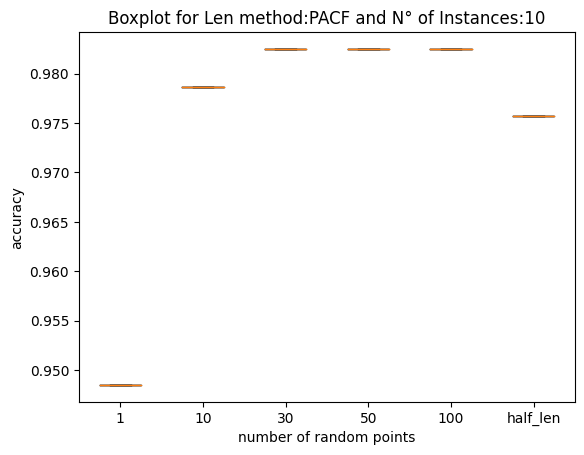

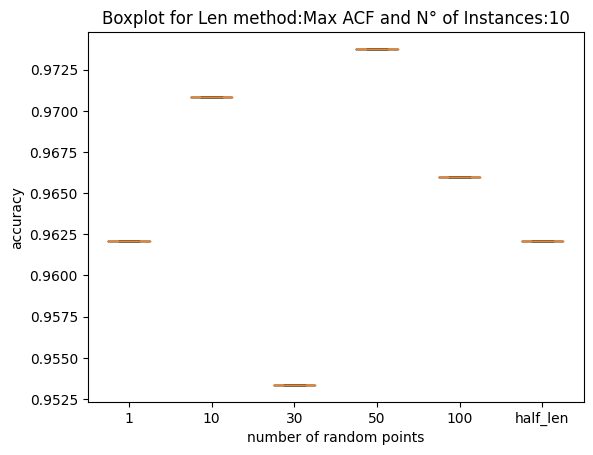

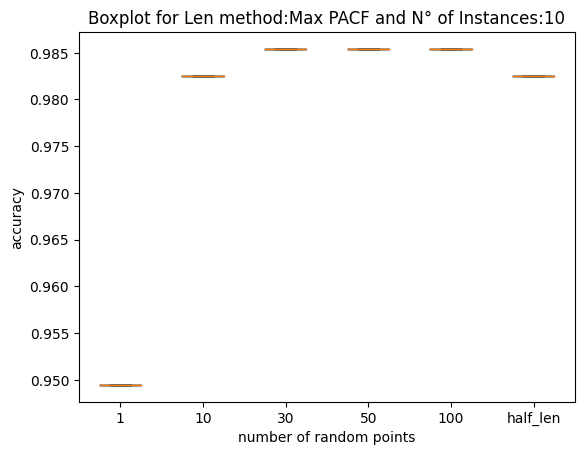

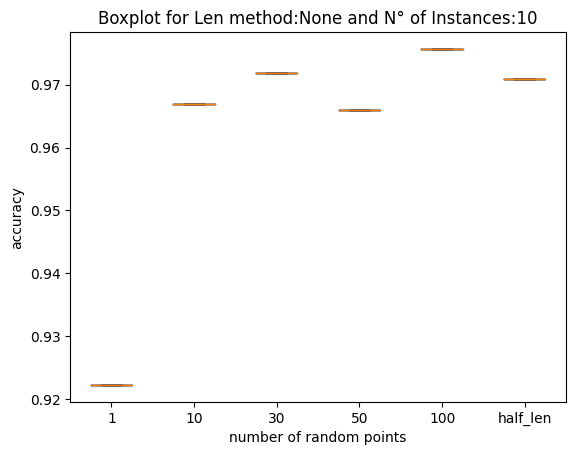

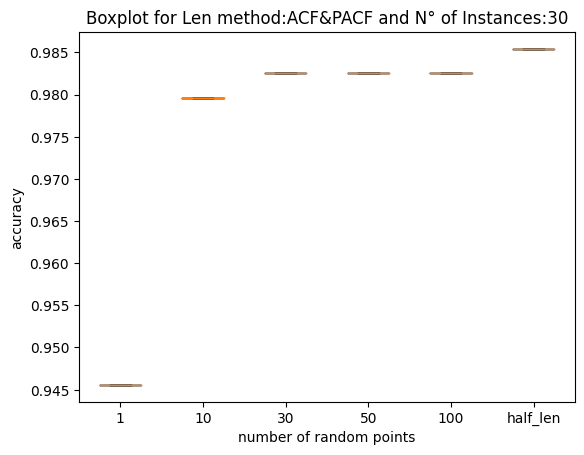

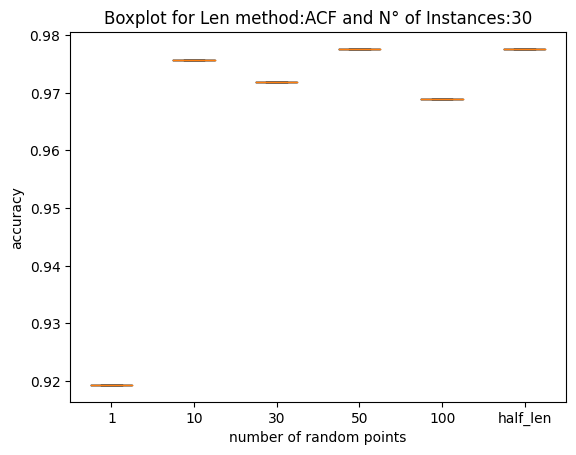

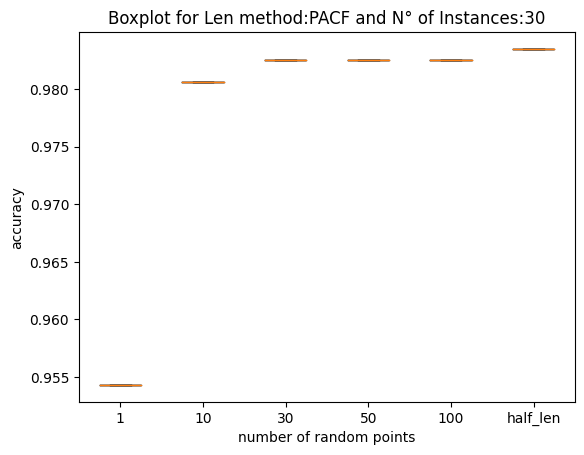

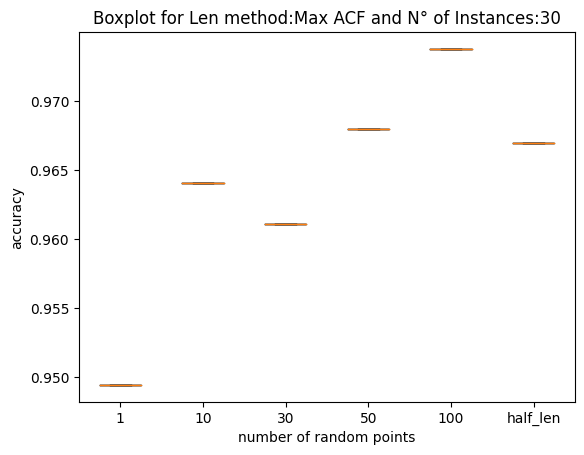

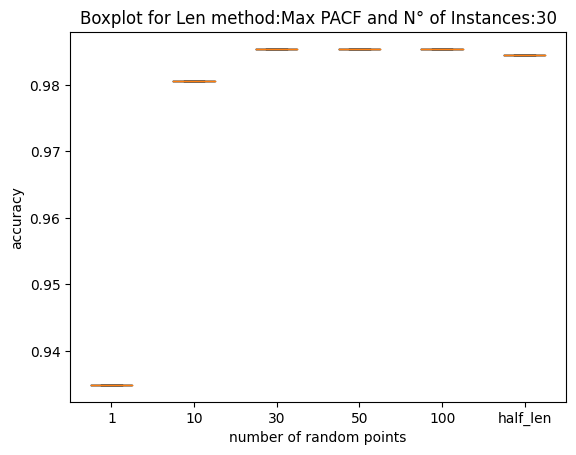

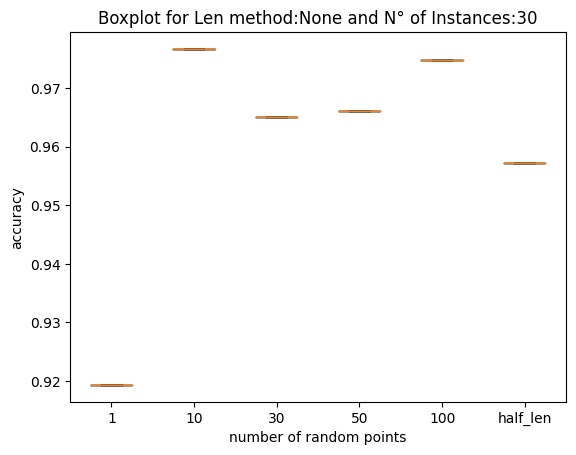

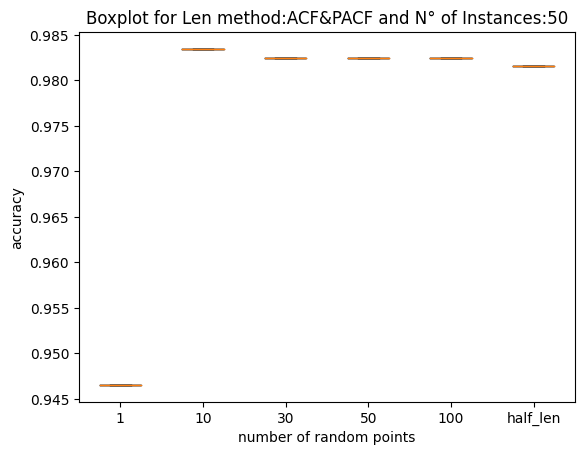

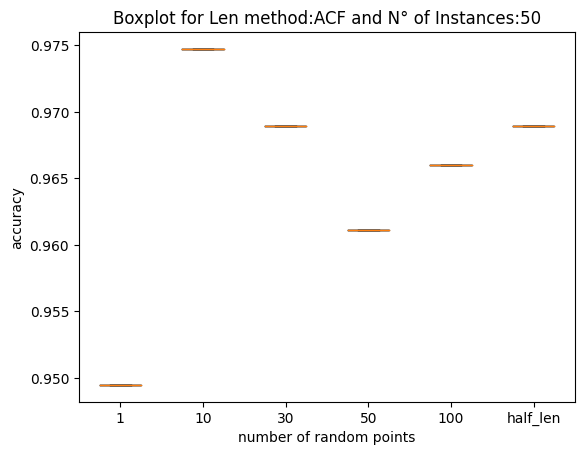

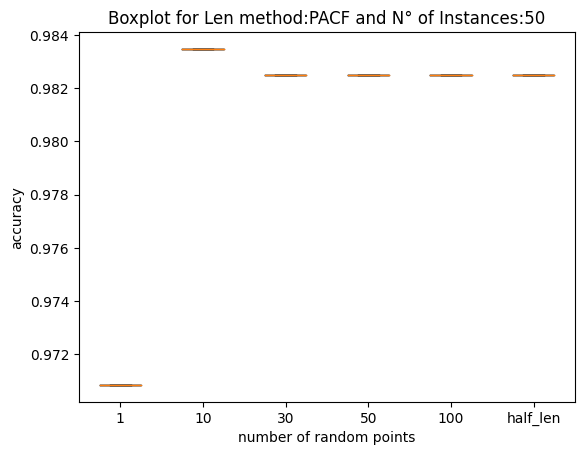

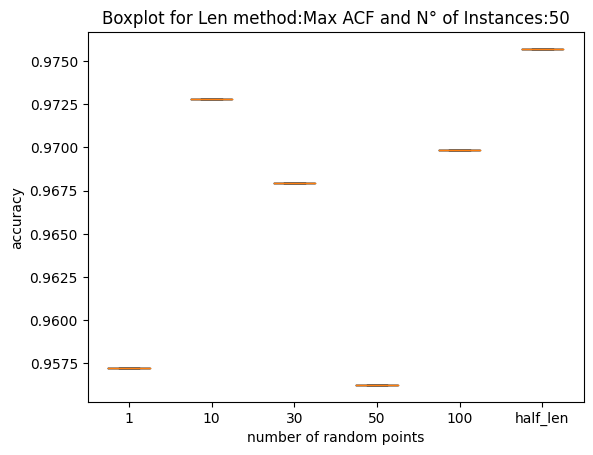

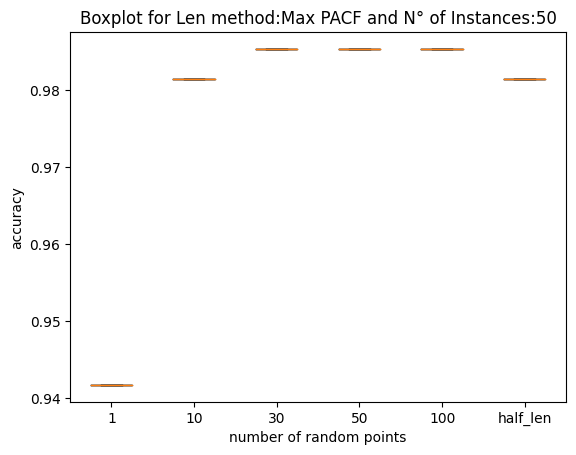

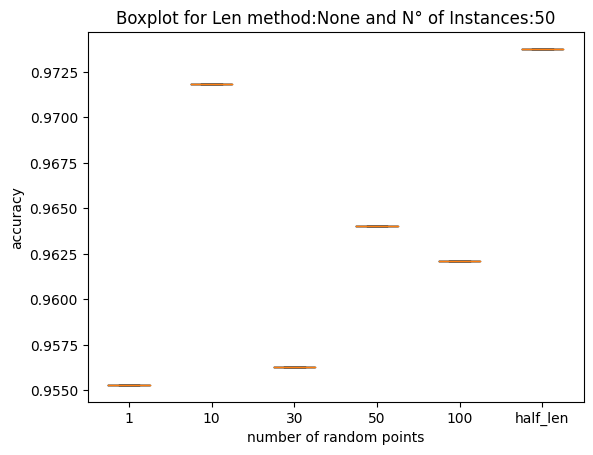

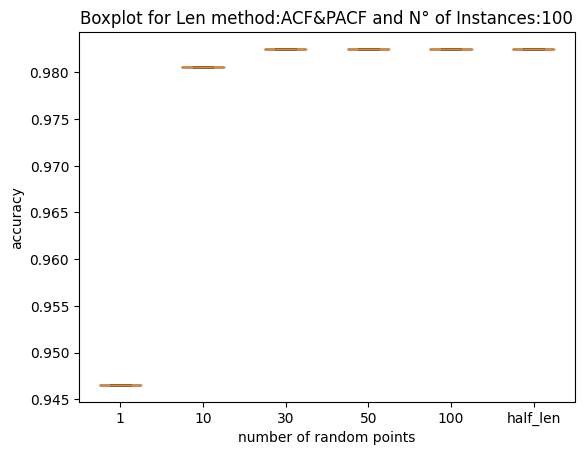

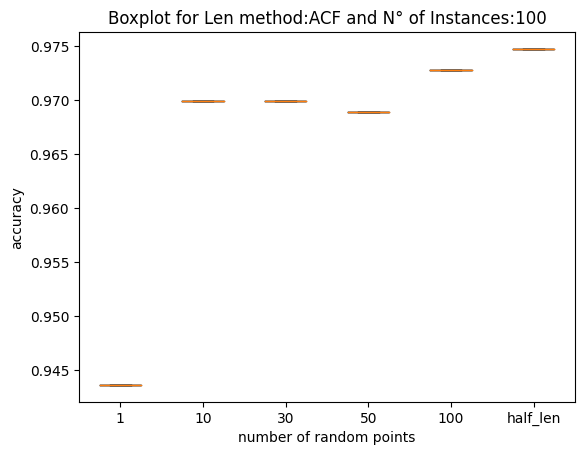

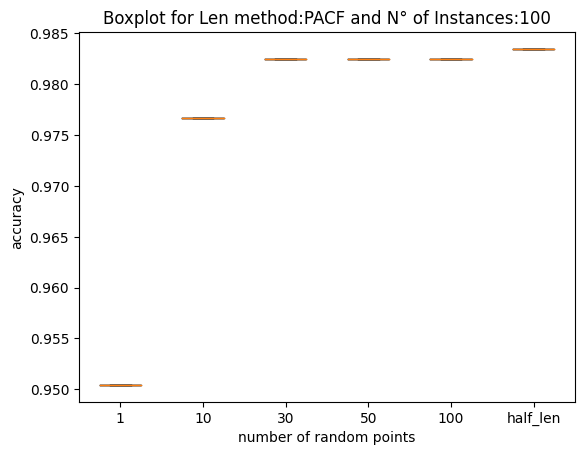

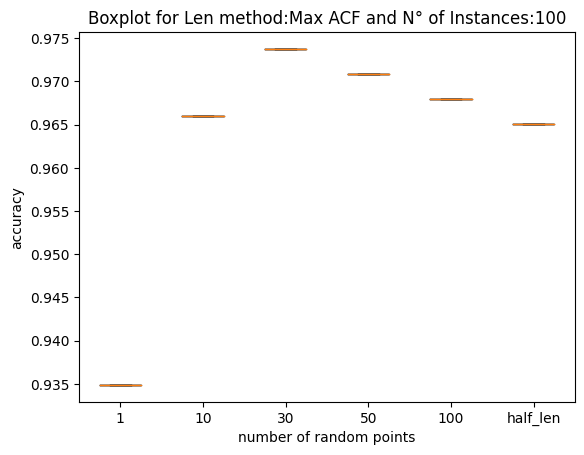

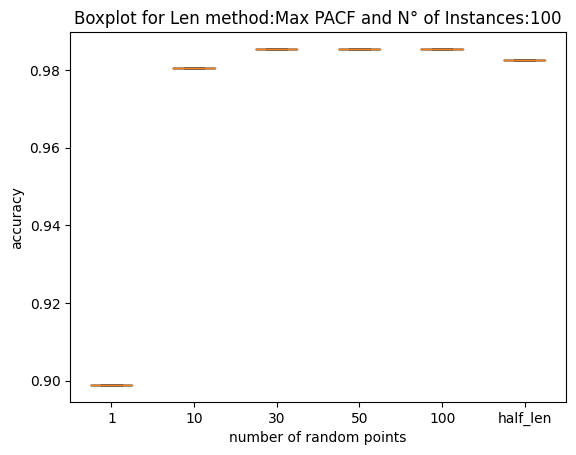

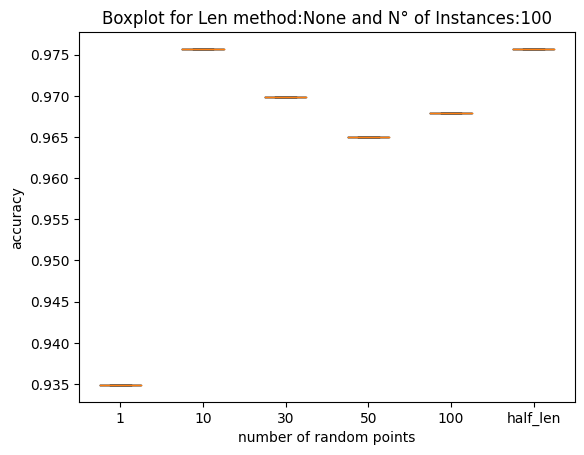

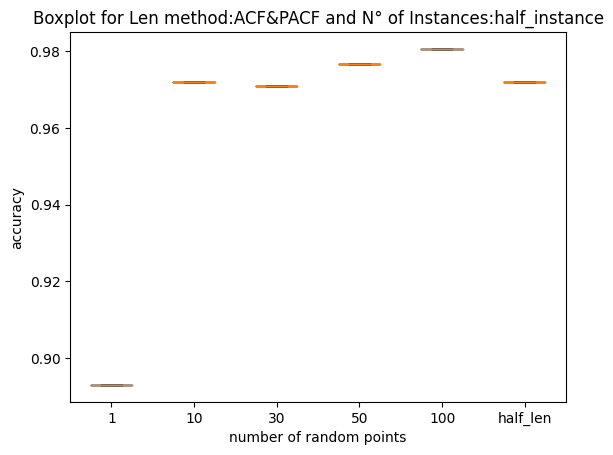

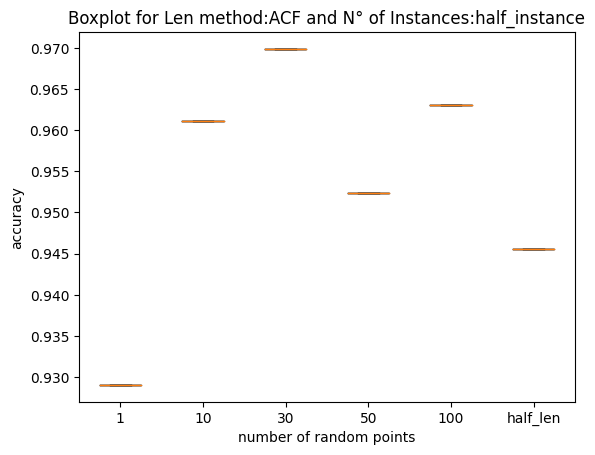

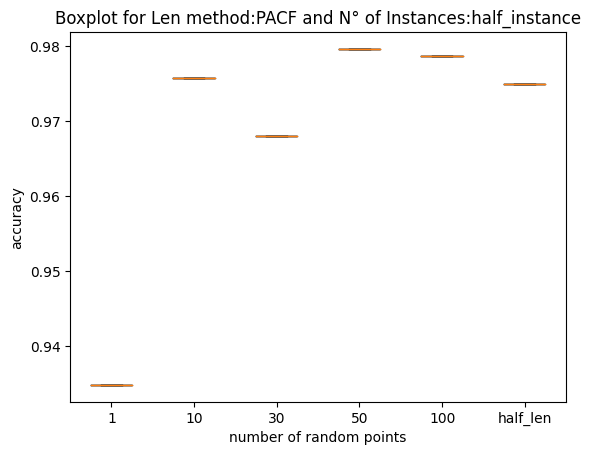

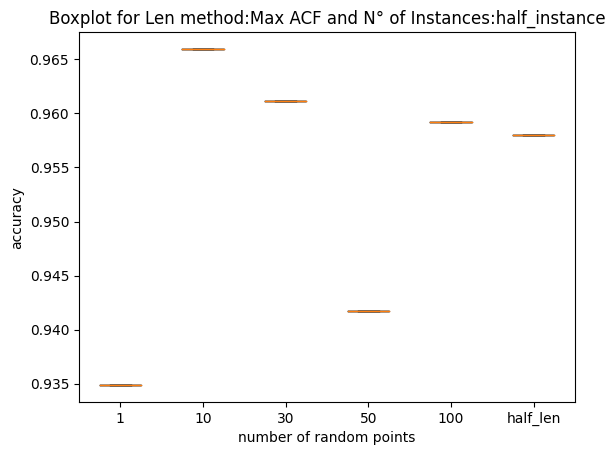

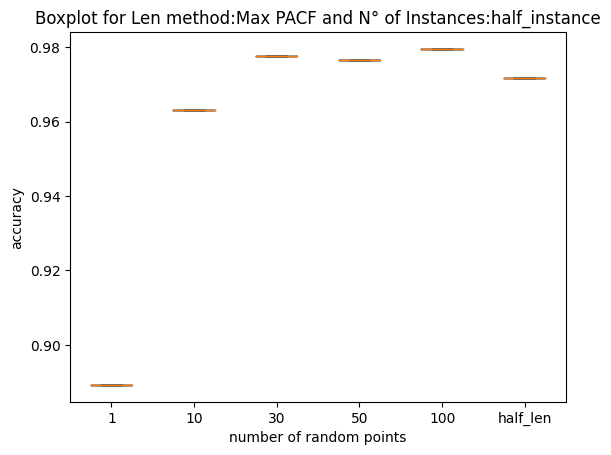

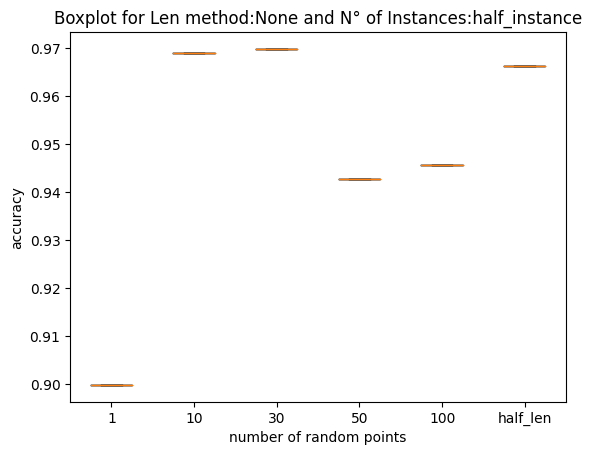

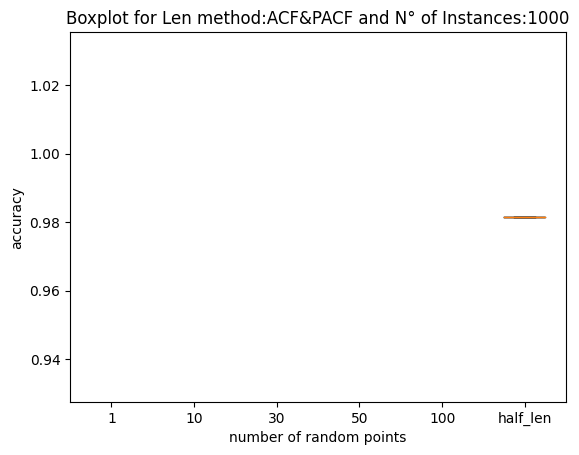

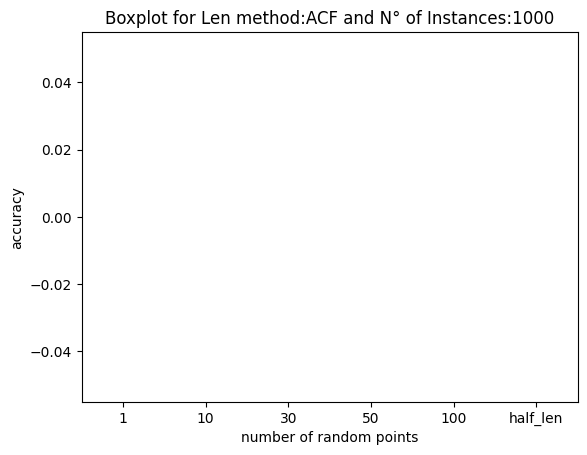

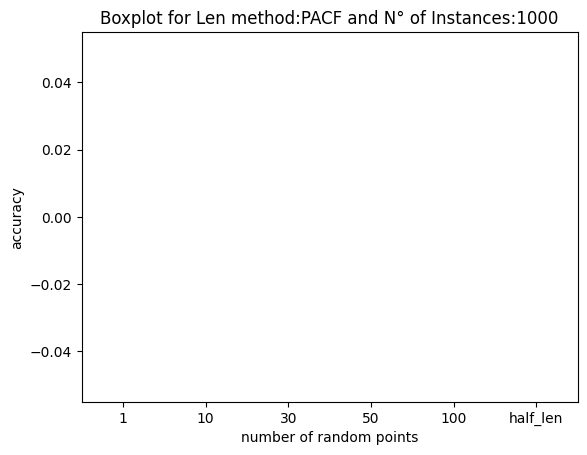

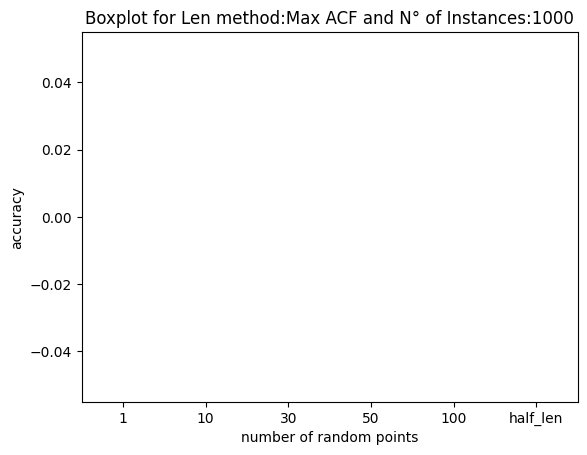

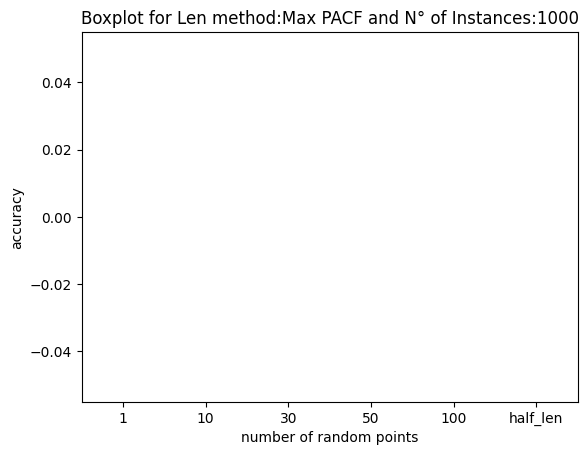

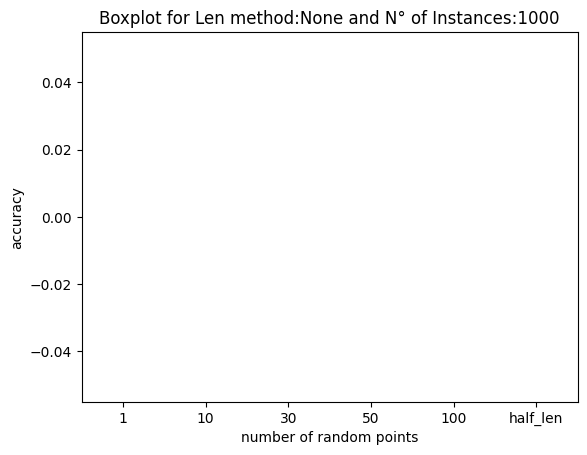

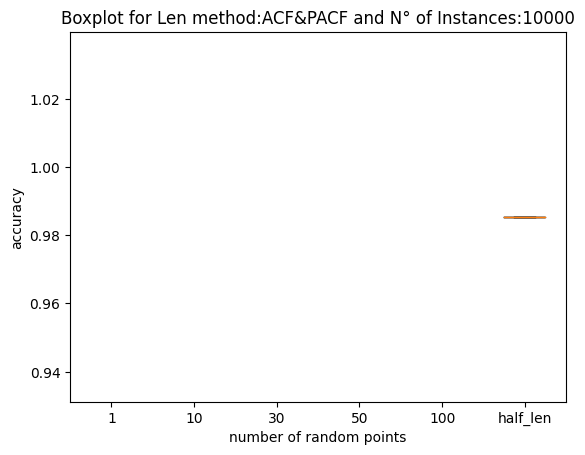

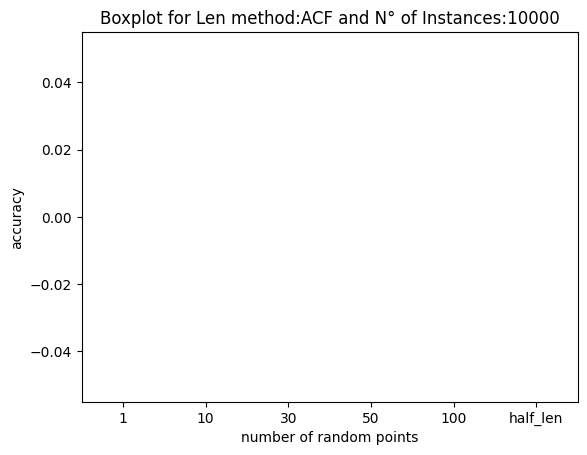

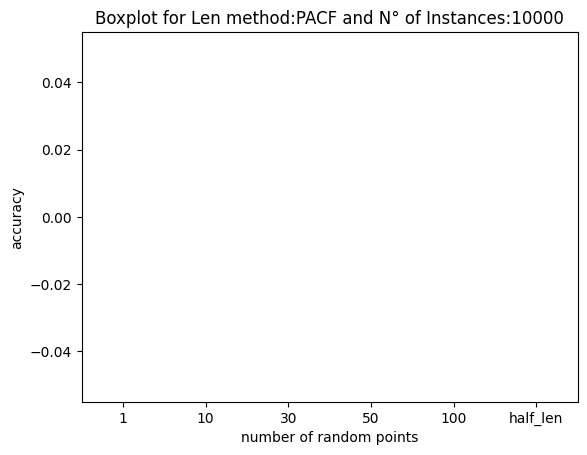

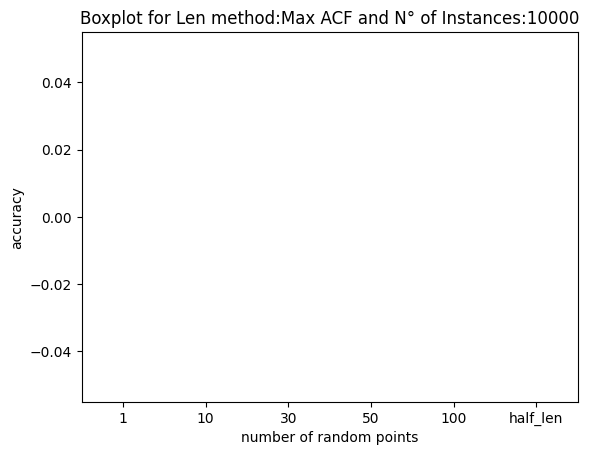

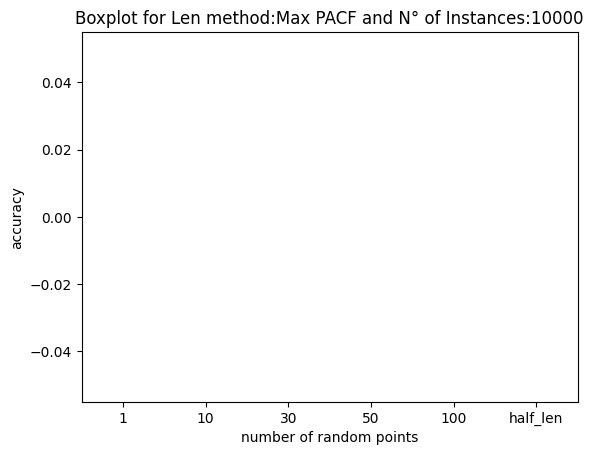

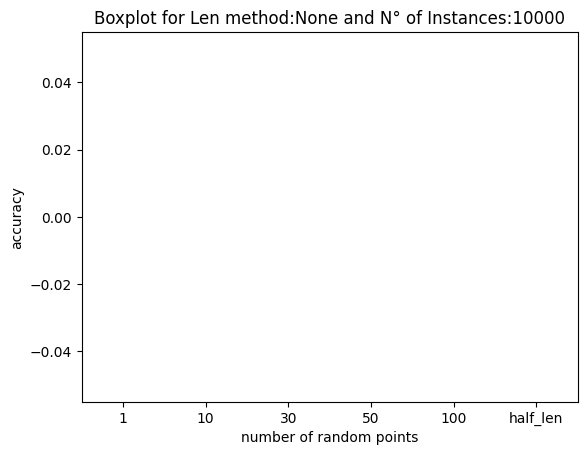

In [136]:
#generate hyperparameter tuning boxplots

df_perf=pd.pivot_table(df_result, values='accuracy', index=['classifier_name','dataset_name','rpoint'], aggfunc='mean')
df_perf=df_perf.reset_index()

for k, ints in enumerate(df_result.nb_per_class.unique()):

    for len_m in df_result.len_method.unique():
        
        
        df_to_cd=df_perf[df_perf.classifier_name.str.contains(r'^'+len_m+':.*nb_inst_per_class='+str(ints)+'$')]
        df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name'], columns=['rpoint'],values='accuracy')
        df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])
        
        #print(df_to_cd.head(5))

        # Plot
        fig, ax = plt.subplots()
        
        
        #order=list(df_to_cd)
        plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)

        # Axis details
        ax.set(xlabel='number of random points', ylabel='accuracy', title='Boxplot for Len method:'+len_m+' and N° of Instances:'+ints)
        #plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
        print(df_to_cd.describe())

        # save plot
        plt.savefig('images_boxplot/boxplot_'+len_m+ints+'.png')




#### Generate CD Diagram Tunning Hyperparameter

In [137]:
from cd_function import *
#generate hyperparameter tuning cd diagrams
for k,ints in enumerate(df_result.nb_per_class.unique()):
   for len_m in df_result.len_method.unique():
      df_to_cd=df_perf[df_perf.classifier_name.str.contains(r'^'+len_m+':.*nb_inst_per_class='+str(ints)+'$')]
      print('len_method'+str(len_m))
      print('nb_per_class'+str(ints))
      draw_cd_diagram(df_to_cd, labels=True, title=len_m +" comparison, nb_inst_per_class="+str(ints), name_file='images_cd_diagram/cd-diagram_'+len_m+ints+'.png')


len_methodACF&PACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodPACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax ACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax PACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodNone
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [ ]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

#### Focus on most accurate lenght method

##### Overall Accuracy

In [ ]:
# highest accurate hyperparameters
average_ranks[average_ranks[0]==min_rank][0].index

In [139]:
# filter by method with ACF&PACF
# create a pivot table with the mean of score by hyperparameter
df_result_acc=df_result[df_result["len_method"]=="ACF&PACF"]
pivot = pd.pivot_table(df_result_acc, values='accuracy', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')
pivot = pivot.reindex(columns=["half_instance","1","10","30","50","100","1000","10000"], index=["half_len","1","10","30","50","100","1000","10000"])
pivot

nb_per_class,half_instance,1,10,30,50,100,1000,10000
rpoint,,,,,,,,
half_len,0.971817,0.954325,0.983479,0.985423,0.981535,0.982507,0.981535,0.985423
1,0.893100,0.812439,0.942663,0.945578,0.946550,0.946550,NaN,NaN
10,0.971817,0.919339,0.981535,0.979592,0.983479,0.980564,NaN,NaN
30,0.970845,0.960155,0.982507,0.982507,0.982507,0.982507,NaN,NaN
50,0.976676,0.945578,0.982507,0.982507,0.982507,0.982507,NaN,NaN
100,0.980564,0.934888,0.982507,0.982507,0.982507,0.982507,NaN,NaN
1000,0.973761,0.937804,0.982507,0.982507,0.982507,0.982507,NaN,NaN
10000,0.976676,0.942663,0.982507,0.982507,0.982507,0.982507,NaN,NaN


In [140]:
# create a pivot table with the variatioon of score by hyperparameter
pivot = pd.pivot_table(df_result_acc, values='accuracy', index=['rpoint'],columns=['nb_per_class'], aggfunc='var')
pivot = pivot.reindex(columns=["half_instance","1","10","30","50","100","1000","10000"], index=["half_len","1","10","30","50","100","1000","10000"])
pivot

nb_per_class,half_instance,1,10,30,50,100,1000,10000
rpoint,,,,,,,,
half_len,0.000100,0.000020,0.000003,0.000000,0.000020,0.000008,0.000011,0.0
1,0.001788,0.000343,0.000589,0.000207,0.000683,0.000054,NaN,NaN
10,0.000037,0.001669,0.000003,0.000059,0.000003,0.000020,NaN,NaN
30,0.000076,0.000088,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50,0.000025,0.000445,0.000000,0.000000,0.000000,0.000000,NaN,NaN
100,0.000011,0.002638,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1000,0.000025,0.000972,0.000000,0.000000,0.000000,0.000000,NaN,NaN
10000,0.000034,0.001346,0.000000,0.000000,0.000000,0.000000,NaN,NaN


##### Overall time complexity

In [ ]:
# create a pivot table with the mean of time spent in minutes
pivot=pd.pivot_table(df_result_acc, values=['time','cweights_time','fsubsequence_time','tdataset_time','tclassifier_time'], index=['dataset_name'], aggfunc='mean')/60
pivot = pivot.reindex(columns=['cweights_time','fsubsequence_time','tdataset_time','tclassifier_time','time'])
pivot

In [ ]:
# create a pivot table with the mean of time spent in minutes by random points and instances per class
pivot = pd.pivot_table(df_result_acc, values='time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')/60
pivot = pivot.reindex(columns=["half_instance","1","10","30","50","100"], index=["half_len","1","10","30","50","100"])
pivot

##### Calculate weights time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='cweights_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

##### Finding subsequences time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='fsubsequence_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

##### Transform Dataset time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='tdataset_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

##### Classifier time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='tclassifier_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')